# Title Of the Project : Data Analytics and Modeling on FIFA Dataset 2021

In [1]:
#Importing essential Libraries

import pandas as pd
import numpy as np
import sys #numpy module
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None) #To Display full columns and rows
pd.options.display.max_rows=None
np.set_printoptions(threshold=sys.maxsize)# Printing all values of array without truncation
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the raw data

raw_data = pd.read_csv(r'Downloads\fifa21_male2.csv')
raw_data.head(10)

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
5,61,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,RW RM,https://cdn.sofifa.com/players/000/061/12_120.png,https://cdn.sof

# Preprocessing

In [3]:
#shape of data

raw_data.shape

(17125, 107)

In [4]:
#data sorting according to overall rating(OVA)

raw_data = raw_data.sort_values(by='OVA',ascending=False)
raw_data.reset_index(inplace=True) 
raw_data.head(10)

,index,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,752,158023,L. Messi,33,93,Argentina,FC Barcelona,93,RW,RW ST CF,https://cdn.sofifa.com/players/158/023/20_120.png,https://cdn.sofifa.com/teams/241/light_60.png,https://cdn.sofifa.com/flags/ar.png,93,FC Barcelona 2004 ~ 2021,"5'7""",159lbs,Left,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,Male
1,142,20801,Cristiano Ronaldo,35,92,Portugal,Juventus,92,ST,ST LW,https://cdn.sofifa.com/players/020/801/20_120.png,https://cdn.sofifa.com/teams/45/light_60.png,https://cdn.sofifa.com/flags/pt.png,92,Juventus 2018 ~ 2022,"6'2""",183lbs,Right,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,Male
2,2871,192985,K. De Bruyne,29,91,Belgium,Manchester City,91,CAM,CAM CM,https://cdn.sofifa.com/players/192/985/20_120.png,https://cdn.sofifa.com/teams/10/light_60.png,https://cdn.sofifa.com/flags/be.png,91,Manchester City 2015 ~ 2023,"5'11""",154lbs,Right,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,91.0,186,68,65,53.0,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,406,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,Male
3,2287,188545,R. Lewandowski,31,91,Poland,FC Bayern München,91,ST,ST,https://cdn.sofifa.com/players/188/545/20_120.png,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/pl.png,91,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,Right,0,"Jul 1, 2014",NaN,€80M,€240K,€132M,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,88.0,96,35,42,19.0,51,15,6,12,8,10,2195,457,4 ★,4★,High,Medium,4 ★,78,91,78,85,43,82,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,Male
4,2650,190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,91,LW,LW CAM,https://cdn.sofifa.com/players/190/871/20_120.png,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/br.png,91,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,Right,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3,M

The data has been assorted with respect to overall value of the player,in descending order


In [5]:
#cheking the number of null values

raw_data.isna().sum()

index                   0
ID                      0
Name                    0
Age                     0
OVA                     0
Nationality             0
Club                   23
BOV                     0
BP                      0
Position              413
Player Photo            0
Club Logo              23
Flag Photo              0
POT                     0
Team & Contract         0
Height                  0
Weight                  0
foot                    0
Growth                  0
Joined                 58
Loan Date End       16215
Value                   0
Wage                    0
Release Clause          0
Contract                0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                58
Skill                   0
Dribbling               0
Curve                  58
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration

In [6]:

raw_data.drop(['Joined'],axis=1,inplace=True)
raw_data.drop(['Loan Date End'],axis=1,inplace=True)
raw_data.drop(['Club Logo'],axis=1,inplace=True)
raw_data = raw_data.dropna(subset=['Position'])

raw_data['Volleys'].replace({np.NaN:raw_data['Volleys'].mean()},inplace=True)
raw_data['Curve'].replace({np.NaN:raw_data['Curve'].mean()},inplace=True)
raw_data['Agility'].replace({np.NaN:raw_data['Agility'].mean()},inplace=True)
raw_data['Balance'].replace({np.NaN:raw_data['Balance'].mean()},inplace=True)
raw_data['Jumping'].replace({np.NaN:raw_data['Jumping'].mean()},inplace=True)
raw_data['Interceptions'].replace({np.NaN:raw_data['Interceptions'].mean()},inplace=True)
raw_data['Positioning'].replace({np.NaN:raw_data['Positioning'].mean()},inplace=True)
raw_data['Composure'].replace({np.NaN:raw_data['Composure'].mean()},inplace=True)
raw_data['Sliding Tackle'].replace({np.NaN:raw_data['Sliding Tackle'].mean()},inplace=True)
raw_data['Vision'].replace({np.NaN:raw_data['Vision'].mean()},inplace=True)



In [7]:
raw_data['Club'].fillna('No club', inplace=True)

In [8]:
raw_data.isna().sum()

index                0
ID                   0
Name                 0
Age                  0
OVA                  0
Nationality          0
Club                 0
BOV                  0
BP                   0
Position             0
Player Photo         0
Flag Photo           0
POT                  0
Team & Contract      0
Height               0
Weight               0
foot                 0
Growth               0
Value                0
Wage                 0
Release Clause       0
Contract             0
Attacking            0
Crossing             0
Finishing            0
Heading Accuracy     0
Short Passing        0
Volleys              0
Skill                0
Dribbling            0
Curve                0
FK Accuracy          0
Long Passing         0
Ball Control         0
Movement             0
Acceleration         0
Sprint Speed         0
Agility              0
Reactions            0
Balance              0
Power                0
Shot Power           0
Jumping              0
Stamina    

Null values present in the data has been taken care of

In [9]:
#converting height and weight
props=raw_data[['Height','Weight']]
props['Ht in ft']=pd.to_numeric(props['Height'].str[0])
props['Ht in in']=pd.to_numeric(props['Height'].str.split("\'").str[1].str.strip('"'))
props['Ht in cm']=(props['Ht in ft']*12+props['Ht in in'])*2.54
props['Weight in lb']=pd.to_numeric(props['Weight'].str.strip('lbs'))
raw_data['Height']=props['Ht in cm']
raw_data['Weight']=props['Weight in lb']



Height has been converted into centimeter and weight has been transformed to figures for ease.

In [10]:
raw_data.columns.tolist()

['index',
 'ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'Player Photo',
 'Flag Photo',
 'POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits',
 'LS',
 'ST',
 'RS',
 'LW

In [11]:
fifa_df = raw_data.copy()
corr_matrix = fifa_df.corr()
corr_matrix['OVA'].sort_values(ascending=False)

OVA                 1.000000
BOV                 0.986262
Reactions           0.872734
Base Stats          0.835867
PAS                 0.702113
Composure           0.699177
DRI                 0.647388
Total Stats         0.614519
POT                 0.593544
Power               0.554098
PHY                 0.546819
Shot Power          0.541014
Age                 0.528402
Vision              0.509265
Mentality           0.500265
Short Passing       0.497279
SHO                 0.487839
Long Passing        0.486518
Skill               0.446587
Attacking           0.435726
Ball Control        0.435369
Curve               0.401270
Long Shots          0.393295
Crossing            0.390150
Aggression          0.385576
FK Accuracy         0.371241
Volleys             0.363515
Dribbling           0.354446
DEF                 0.347227
Stamina             0.345130
Positioning         0.342192
Strength            0.339501
Penalties           0.316850
Movement            0.312254
Heading Accura

In [12]:
#Removed unwanted columns and reduce parameters

data = raw_data[['Name','Age','OVA','Nationality','Club','Contract','Composure','BP','PAS','Position','POT','Height','Weight','DEF','foot','Value','Wage','Attacking',
 'Crossing','Finishing','Heading Accuracy','Short Passing','Volleys','Skill','Dribbling','Curve','FK Accuracy','Long Passing','Ball Control',
 'Movement','Acceleration','Sprint Speed','Agility','Reactions','Balance','Power','Shot Power','Jumping','Stamina','Strength','Long Shots',
 'Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Defending','Marking','Standing Tackle',
 'Sliding Tackle','Goalkeeping','GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes','Total Stats','Base Stats','Gender']]

Parameters has been selected based on correlation with Overall value and other important parameters has been kept.

In [13]:
#replacing space in column heading with underscore(_)

column_name = data.columns
for column in column_name:
    new_name = column.replace(' ','_')
    data.rename(columns={column:new_name},inplace = True)

In [14]:
#the euro symbol,K & M all were replaced 

data['Value'] = data['Value'].replace({'\€': '','\.': '', 'K': '000','M':'000000'}, regex=True).astype(float)
data['Wage'] = data['Wage'].replace({'\€': '','\.': '', 'K': '000','M':'000000'}, regex=True).astype(float)
data['Weight'] = data['Weight'].replace({'lbs': ''}, regex=True).astype(int)
data.rename(columns={'Weight':'Weight_in_lbs'},inplace = True)

In [15]:
data.head(10)

,Name,Age,OVA,Nationality,Club,Contract,Composure,BP,PAS,Position,POT,Height,Weight_in_lbs,DEF,foot,Value,Wage,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Gender
0,L. Messi,33,93,Argentina,FC Barcelona,2004 ~ 2021,96.0,RW,91,RW ST CF,93,170.18,159,38,Left,6.750000e+08,560000.0,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,91,32,35,24.0,54,6,11,15,14,8,2231,466,Male
1,Cristiano Ronaldo,35,92,Portugal,Juventus,2018 ~ 2022,95.0,ST,81,ST LW,92,187.96,183,35,Right,4.600000e+07,220000.0,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,84,28,32,24.0,58,7,11,15,14,11,2221,464,Male
2,K. De Bruyne,29,91,Belgium,Manchester City,2015 ~ 2023,91.0,CAM,93,CAM CM,91,180.34,154,64,Right,8.700000e+07,370000.0,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,186,68,65,53.0,56,15,13,5,10,13,2304,485,Male
3,R. Lewandowski,31,91,Poland,FC Bayern München,2014 ~ 2023,88.0,ST,78,ST,91,182.88,176,43,Right,8.000000e+07,240000.0,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,96,35,42,19.0,51,15,6,12,8,10,2195,457,Male
4,Neymar Jr,28,91,Brazil,Paris Saint-Germain,2017 ~ 2022,93.0,LW,86,LW CAM,91,175.26,150,36,Right,9.000000e+07,270000.0,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,94,35,30,29.0,59,9,9,15,15,11,2175,451,Male
5,J. Oblak,27,91,Slovenia,Atlético Madrid,2014 ~ 2023,68.0,GK,78,GK,93,187.96,192,52,Right,7.500000e+07,125000.0,95,13,11,15,43,13.0,109,12,13.0,14,40,30,307,43,60,67.0,88,49.0,268,59,78.0,41,78,12,140,34,19.0,11.0,65.0,11,57,27,12,18.0,437,87,92,78,90,90,1413,489,Male
6,M. ter Stegen,28,90,Germany,FC Barcelona,2014 ~ 2022,70.0,GK,88,GK,93,187.96,187,45,Right,6.950000e+08,260000.0,118,18,14,11,61,14.0,144,21,18.0,12,63,30,254,38,50,37.0,86,43.0,268,66,79.0,35,78,10,171,43,22.0,11.0,70.0,25,48,25,13,10.0,439,88,85,88,88,90,1442,484,Male
7,K. Mbappé,21,90,France,Paris Saint-Germain,2018 ~ 2022,84.0,ST,78,ST LW RW,95,177.80,161,39,Right,1.055000e+09,160000.0,408,78,91,73,83,83.0,394,92,79.0,63,70,90,458,96,96,92.0,92,82.0,404,86,77.0,86,76,79,341,62,38.0,91.0,80.0,70,100,34,34,32.0,42,13,5,7,11,6,2147,466,Male
8,Alisson,27,90,Brazil,Liverpool,2018 ~ 2024,65.0,GK,85,GK,91,190.50,201,51,Right,6.250000e+08,160000.0,114,17,13,19,45,20.0,138,27,19.0,18,44,30,268,56,47,40.0,88,37.0,240,64,52.0,32,78,14,140,27,11.0,13.0,66.0,23,50,15,19,16.0,439,86,88,85,91,89,1389,490,Male
9,V. van Dijk,28,90,Netherlands,Liverpool,2018 ~ 2023,90.0,CB,71,CB,91,193.04,203,91,Right,7.550000e+08,210000.0,316,53,52,87,79,45.0,363,70,60.0,70,86,77,354,72,79,61.0,89,53.0,402,81,90.0,75,92,64,347,83,90.0,47.0,65.0,62,272,93,93,86.0,58,13,10,13,11,11,2112,455,Male


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 17124
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              16712 non-null  object 
 1   Age               16712 non-null  int64  
 2   OVA               16712 non-null  int64  
 3   Nationality       16712 non-null  object 
 4   Club              16712 non-null  object 
 5   Contract          16712 non-null  object 
 6   Composure         16712 non-null  float64
 7   BP                16712 non-null  object 
 8   PAS               16712 non-null  int64  
 9   Position          16712 non-null  object 
 10  POT               16712 non-null  int64  
 11  Height            16712 non-null  float64
 12  Weight_in_lbs     16712 non-null  int32  
 13  DEF               16712 non-null  int64  
 14  foot              16712 non-null  object 
 15  Value             16712 non-null  float64
 16  Wage              16712 non-null  float6

In [17]:
#Describing the data

data.describe()

,Age,OVA,Composure,PAS,POT,Height,Weight_in_lbs,DEF,Value,Wage,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats
count,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,1.671200e+04,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.00000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000
mean,25.070907,66.911860,59.850995,58.826113,72.558341,181.200092,165.494734,50.181546,1.538367e+07,10547.271422,258.328865,51.566060,47.942556,53.522020,60.485639,44.914718,266.416946,57.907671,49.495682,44.229057,54.252573,60.644507,323.423528,65.685974,65.685974,64.725561,62.837243,64.783255,302.340115,59.63966,65.145076,63.466730,65.202669,49.034107,261.489110,56.851065,46.954812,52.352286,55.374115,50.106510,141.421434,47.205302,48.245692,46.075207,77.213021,15.529440,15.396063,15.349809,15.421972,15.647618,1630.633018,361.201173
std,4.807434,6.896289,11.657868,10.196838,5.757549,6.889945,15.741736,16.864984,3.913702e+07,21306.474616,71.958371,17.829301,19.373425,16.864766,13.910901,17.642720,76.523743,18.004183,18.094755,17.397780,14.826737,15.820819,54.660674,14.551697,14.327165,14.331459,9.065976,14.001613,49.314569,13.34135,11.900652,15.254444,12.650370,19.008048,62.668668,17.007108,20.844465,19.048223,13.697804,15.597628,61.537168,20.154847,21.469266,21.143808,80.616932,16.731261,16.017594,15.837396,16.273900,17.032713,260.130309,40.409957
min,16.000000,38.000000,12.000000,25.000000,47.000000,154.940000,110.000000,13.000000,0.000000e+00,0.000000,33.000000,6.000000,3.000000,5.000000,7.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,122.000000,12.000000,13.000000,14.000000,24.000000,17.000000,128.000000,13.00000,22.000000,11.000000,16.000000,4.000000,50.000000,9.000000,4.000000,2.000000,10.000000,7.000000,17.000000,3.000000,5.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,731.000000,228.000000
25%,21.000000,62.000000,53.000000,52.000000,69.000000,175.260000,154.000000,35.000000,3.750000e+05,1000.000000,231.000000,40.000000,33.000000,46.000000,56.000000,32.000000,232.000000,53.000000,37.000000,32.000000,45.000000,57.000000,295.000000,59.000000,59.000000,57.000000,57.000000,57.000000,272.000000,50.00000,58.000000,56.000000,58.000000,35.000000,234.000000,45.000000,26.000000,43.000000,46.000000,40.000000,84.000000,29.000000,28.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1492.000000,333.000000
50%,24.000000,67.000000,60.000000,59.000000,72.000000,180.340000,165.000000,53.000000,8.000000e+05,3000.000000,271.000000,56.000000,52.000000,56.000000,63.000000,46.000000,278.000000,63.000000,51.000000,43.000000,57.000000,64.000000,332.000000,68.000000,68.000000,67.000000,63.000000,67.000000,308.000000,61.00000,66.000000,66.000000,66.000000,53.000000,269.000000,59.000000,53.000000,57.000000,57.000000,51.000000,158.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1658.000000,362.000000
75%,28.000000,72.000000,68.000000,66.000000,76.000000,185.420000,176.000000,64.000000,1.500000e+07,11000.000000,305.000000,65.000000,63.000000,65.000000,69.00000

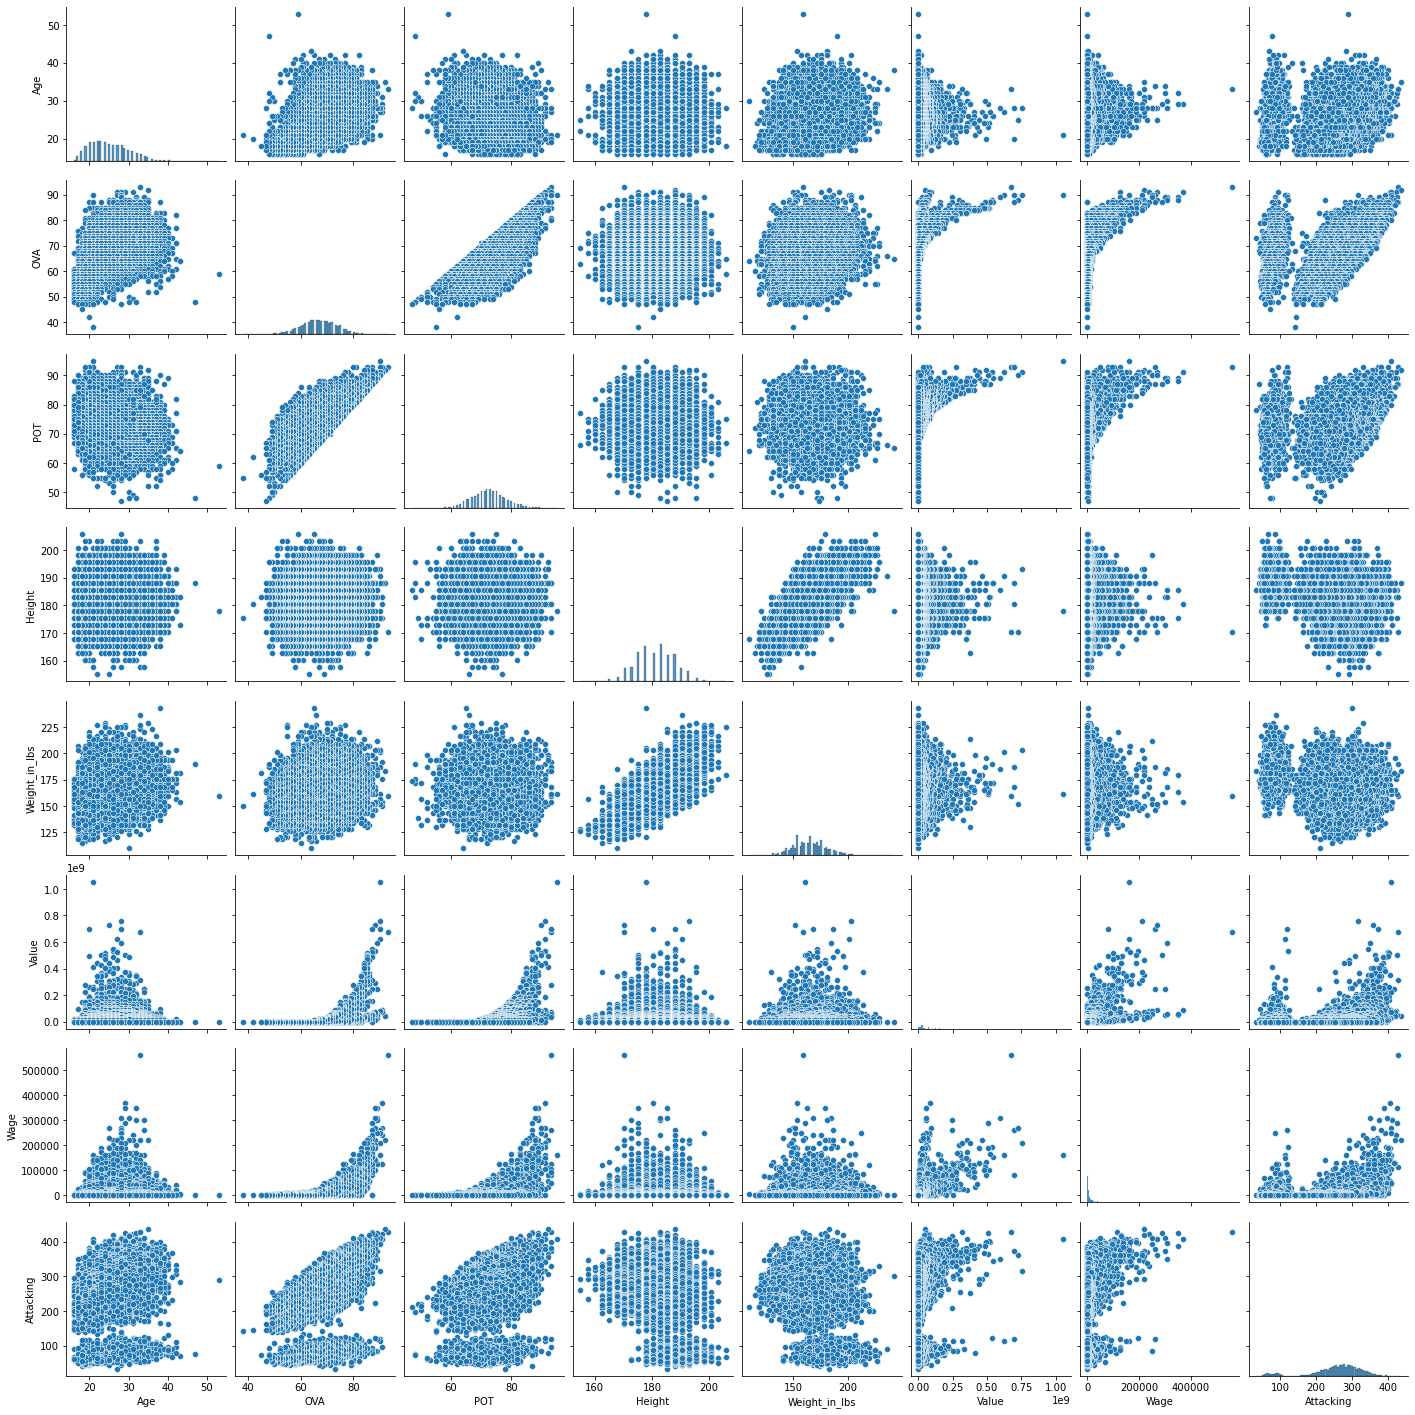

In [18]:
#To find the relation between the basic parameters we plot a pair plot

sns.pairplot(data[['Age', 'OVA','POT', 'Height', 'Weight_in_lbs','Value', 'Wage', 'Attacking']])

#Inferences from above Pairplot

1. From the above pairplot we can see that the 'Potential' the player and 'OVA' of the player having a relation. Value of          Potential is affecting the OVA
2. When Age increses the Potential of the player Decreases (Age has a negative relation to Potential)
3. The age has an impact on the Attacking skill but there are some exeptions.

<AxesSubplot:>

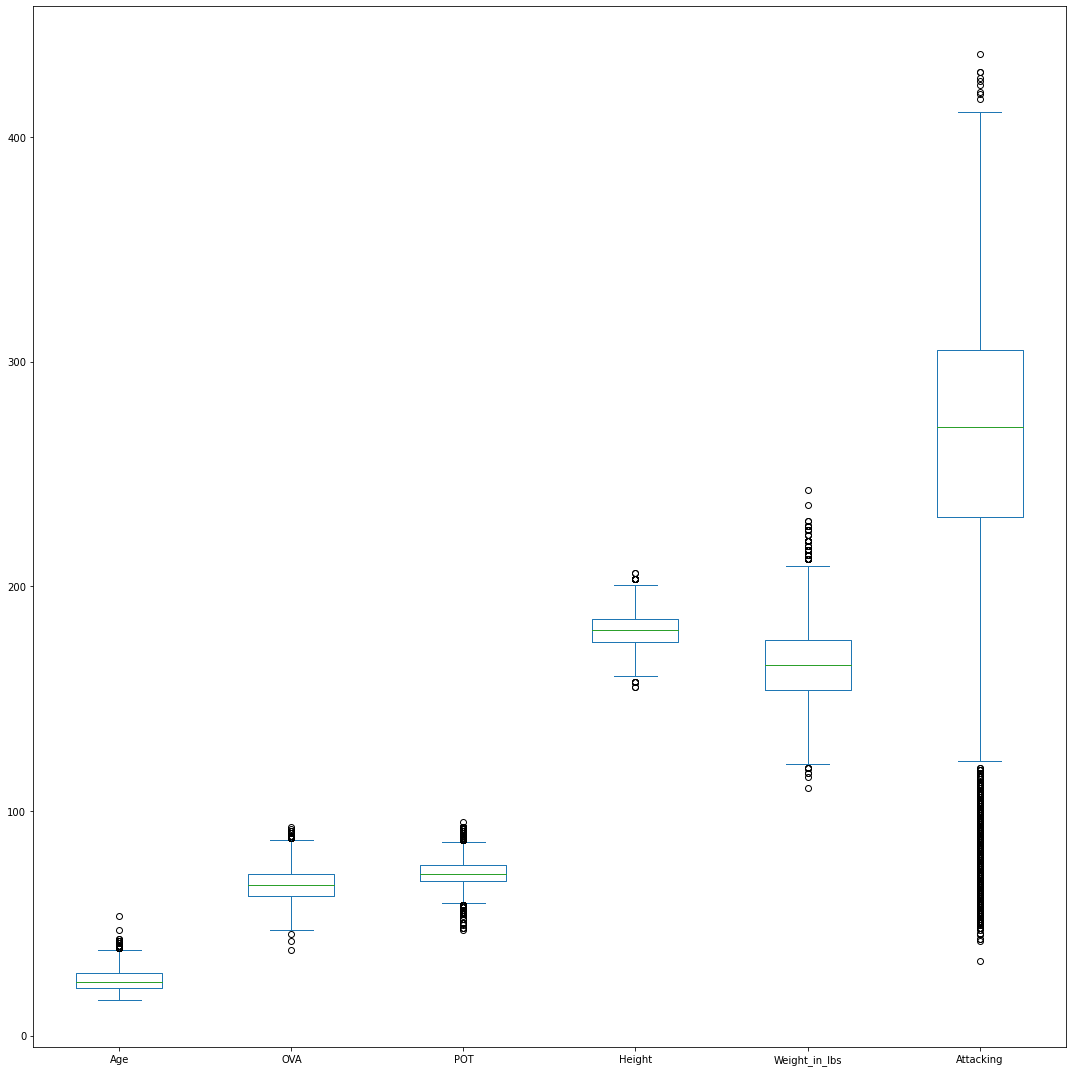

In [19]:
#Finding Outliers

plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["figure.autolayout"] = True
data[['Age', 'OVA','POT', 'Height', 'Weight_in_lbs','Attacking']].plot(kind='box')


##### Working on Outliers in Age Parameter

In [20]:
#Working on Outliers in Age Parameter

q1 = np.percentile(data['Age'],25,interpolation='midpoint')
q2 = np.percentile(data['Age'],50,interpolation='midpoint')
q3 = np.percentile(data['Age'],75,interpolation='midpoint')

print(q1)
print(q2)
print(q3)

21.0
24.0
28.0


In [21]:
iqr = q3-q1

low_lim = q1-1.5*iqr
up_lim = q3+1.5*iqr

print(low_lim,'&',up_lim)

10.5 & 38.5


In [22]:
age_outlier = []
for x in data['Age']:
    if(x>up_lim)or(x<low_lim):
        age_outlier.append(x)
        
age_outlier

[39,
 42,
 39,
 39,
 40,
 42,
 39,
 39,
 39,
 40,
 39,
 39,
 40,
 40,
 39,
 40,
 39,
 39,
 39,
 40,
 40,
 41,
 40,
 39,
 39,
 39,
 39,
 42,
 39,
 40,
 42,
 40,
 40,
 39,
 40,
 39,
 39,
 40,
 39,
 41,
 39,
 39,
 39,
 40,
 41,
 41,
 40,
 39,
 42,
 40,
 43,
 43,
 39,
 40,
 40,
 39,
 42,
 40,
 39,
 39,
 39,
 41,
 53,
 41,
 40,
 47]

In [23]:
age_indx = data['Age']>up_lim
age_drop = data.loc[age_indx].index
age_drop

Int64Index([  169,   269,   418,  1023,  1077,  1344,  1738,  2212,  2223,
             2299,  2335,  2360,  2691,  2694,  2701,  2729,  2812,  2979,
             2994,  3023,  3084,  3218,  3228,  3362,  3963,  3999,  4250,
             4386,  4496,  4564,  4888,  4991,  5009,  5649,  5686,  5689,
             6785,  6789,  6899,  7009,  7806,  7814,  7871,  7919,  7977,
             8178,  8354,  9105, 10214, 10686, 11231, 11943, 11968, 13132,
            13135, 13662, 13683, 13691, 14186, 14381, 14721, 14806, 14809,
            15472, 15950, 17111],
           dtype='int64')

In [24]:
data = data.drop(age_drop) # droped Upper limit values from dataset


##### Working on Outliers in Attacking Parameter

In [25]:
#Working on Outliers in Attacking Parameter

q1 = np.percentile(data['Attacking'],25,interpolation='midpoint')
q2 = np.percentile(data['Attacking'],50,interpolation='midpoint')
q3 = np.percentile(data['Attacking'],75,interpolation='midpoint')

print(q1)
print(q2)
print(q3)

232.0
271.0
305.0


In [26]:
iqr = q3-q1

low_lim = q1-1.5*iqr
up_lim = q3+1.5*iqr

print(low_lim,'&',up_lim)

122.5 & 414.5


In [27]:
atck_outlier = []
for x in data['Attacking']:
    if(x>up_lim)or(x<low_lim):
        atck_outlier.append(x)
        
atck_outlier

[429,
 437,
 423,
 95,
 118,
 114,
 86,
 119,
 426,
 420,
 86,
 429,
 86,
 425,
 94,
 84,
 78,
 114,
 84,
 419,
 78,
 91,
 94,
 69,
 105,
 90,
 85,
 93,
 72,
 98,
 417,
 93,
 92,
 113,
 115,
 84,
 74,
 99,
 81,
 82,
 117,
 70,
 82,
 105,
 86,
 122,
 91,
 101,
 88,
 55,
 88,
 87,
 100,
 78,
 95,
 78,
 78,
 97,
 75,
 80,
 108,
 91,
 102,
 80,
 81,
 106,
 73,
 85,
 103,
 99,
 103,
 83,
 55,
 118,
 61,
 94,
 99,
 87,
 95,
 94,
 43,
 92,
 70,
 87,
 103,
 43,
 97,
 69,
 72,
 81,
 92,
 88,
 85,
 100,
 101,
 93,
 84,
 54,
 89,
 71,
 91,
 77,
 72,
 94,
 75,
 95,
 90,
 112,
 107,
 99,
 98,
 90,
 78,
 94,
 95,
 100,
 85,
 90,
 98,
 122,
 89,
 106,
 102,
 122,
 95,
 90,
 85,
 86,
 89,
 103,
 110,
 80,
 95,
 109,
 76,
 85,
 68,
 93,
 100,
 90,
 96,
 89,
 94,
 87,
 74,
 106,
 70,
 78,
 95,
 95,
 95,
 66,
 104,
 102,
 72,
 104,
 99,
 105,
 83,
 73,
 93,
 63,
 67,
 74,
 75,
 98,
 90,
 73,
 111,
 76,
 90,
 91,
 76,
 87,
 50,
 104,
 56,
 69,
 91,
 98,
 118,
 106,
 95,
 88,
 83,
 72,
 90,
 94,
 94,
 88,


In [28]:
atck_indx_up = data['Attacking']>up_lim
atck_drop = data.loc[atck_indx_up].index
atck_drop

#We don't droping these index because they are the players having high OVA rating and they are the master players.

Int64Index([0, 1, 3, 17, 21, 31, 38, 65, 161], dtype='int64')

In [29]:
atck_indx_dwn = data['Attacking']<low_lim
atck_droping = data.loc[atck_indx_dwn].index
atck_droping

Int64Index([    5,     6,     8,    12,    16,    25,    37,    44,    45,
               48,
            ...
            17060, 17073, 17083, 17102, 17106, 17109, 17110, 17112, 17121,
            17122],
           dtype='int64', length=1482)

In [30]:
df_bp =data[data['Attacking']<low_lim]
pd.DataFrame(df_bp,columns=['Name','BP'])

,Name,BP
5,J. Oblak,GK
6,M. ter Stegen,GK
8,Alisson,GK
12,T. Courtois,GK
16,M. Neuer,GK
25,S. Handanovič,GK
37,W. Szczęsny,GK
44,H. Lloris,GK
45,O. Kahn,GK
48,K. Navas,GK


From above We can't droping the outliers lessthan the lower limit because of they all are Goal Keepers so the attacking skills of them are not like forwades,midfielders or defenders.

# Exploring Data

In [31]:
#Finding unique values on BP

data.BP.unique()

array(['RW', 'ST', 'CAM', 'LW', 'GK', 'CB', 'CDM', 'CF', 'CM', 'RWB',
       'RB', 'LM', 'LB', 'RM', 'LWB'], dtype=object)

Here, we can observe that there are 15 different best positions(BP) that the players plays in. The position data is actually very diversified. For our convenience we will categorize the positions broadly as 'forwards', 'midfielders', 'defenders' and goalkeepers. In 'forward' category we will keep the positions -'RW','ST','LW','CF'). Same thing we will do for 'midfielders', 'defenders' and 'goalkeepers'. We will create different data sets for the forwards, midfielders, defenders and goalkeepers. This is actually the preparation of the data that we need to do to analyse the choosen dataset.

In [32]:
#Grouping data based on Position of players

frwd_plyr = data[(data.BP == 'RW') | (data.BP == 'ST') | (data.BP == 'LW') | (data.BP == 'CF') ]
frwd_plyr.reset_index(inplace=True)
frwd_plyr.drop('index',axis=1,inplace=True)

midfld_plyr = data[(data.BP == 'CAM') | (data.BP == 'CDM') | (data.BP == 'CM') | (data.BP == 'LM') |(data.BP == 'RM')]
midfld_plyr.reset_index(inplace=True)
midfld_plyr.drop('index',axis=1,inplace=True)

defender = data[(data.BP == 'CB') |  (data.Position == 'RWB') |  (data.Position == 'RB') |  (data.Position == 'LB') | (data.Position == 'LWB') ]
defender.reset_index(inplace=True)
defender.drop('index',axis=1,inplace=True)

gk = data[(data.BP == 'GK') ]
gk.reset_index(inplace=True)
gk.drop('index',axis=1,inplace=True)

### Top 10 Forward Players according to OVA

In [33]:

frwd_plyr.head()

,Name,Age,OVA,Nationality,Club,Contract,Composure,BP,PAS,Position,POT,Height,Weight_in_lbs,DEF,foot,Value,Wage,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Gender
0,L. Messi,33,93,Argentina,FC Barcelona,2004 ~ 2021,96.0,RW,91,RW ST CF,93,170.18,159,38,Left,6.750000e+08,560000.0,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,91,32,35,24.0,54,6,11,15,14,8,2231,466,Male
1,Cristiano Ronaldo,35,92,Portugal,Juventus,2018 ~ 2022,95.0,ST,81,ST LW,92,187.96,183,35,Right,4.600000e+07,220000.0,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,84,28,32,24.0,58,7,11,15,14,11,2221,464,Male
2,R. Lewandowski,31,91,Poland,FC Bayern München,2014 ~ 2023,88.0,ST,78,ST,91,182.88,176,43,Right,8.000000e+07,240000.0,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,96,35,42,19.0,51,15,6,12,8,10,2195,457,Male
3,Neymar Jr,28,91,Brazil,Paris Saint-Germain,2017 ~ 2022,93.0,LW,86,LW CAM,91,175.26,150,36,Right,9.000000e+07,270000.0,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,94,35,30,29.0,59,9,9,15,15,11,2175,451,Male
4,K. Mbappé,21,90,France,Paris Saint-Germain,2018 ~ 2022,84.0,ST,78,ST LW RW,95,177.80,161,39,Right,1.055000e+09,160000.0,408,78,91,73,83,83.0,394,92,79.0,63,70,90,458,96,96,92.0,92,82.0,404,86,77.0,86,76,79,341,62,38.0,91.0,80.0,70,100,34,34,32.0,42,13,5,7,11,6,2147,466,Male


### Top 10 Midfielders according to OVA

In [34]:
midfld_plyr.head()

,Name,Age,OVA,Nationality,Club,Contract,Composure,BP,PAS,Position,POT,Height,Weight_in_lbs,DEF,foot,Value,Wage,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Gender
0,K. De Bruyne,29,91,Belgium,Manchester City,2015 ~ 2023,91.0,CAM,93,CAM CM,91,180.34,154,64,Right,87000000.0,370000.0,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,186,68,65,53.0,56,15,13,5,10,13,2304,485,Male
1,Casemiro,28,89,Brazil,Real Madrid,2013 ~ 2023,84.0,CDM,76,CDM,89,185.42,185,86,Right,595000000.0,310000.0,349,58,64,80,84,63.0,369,69,63.0,74,84,79,343,60,69,61.0,87,66.0,437,88,87.0,90,91,81,396,91,87.0,72.0,80.0,66,259,84,88,87.0,67,13,14,16,12,12,2220,463,Male
2,J. Kimmich,25,88,Germany,FC Bayern München,2015 ~ 2023,85.0,CDM,86,CDM RB,90,175.26,161,81,Right,65000000.0,145000.0,383,91,66,72,87,67.0,400,83,85.0,61,86,85,399,77,66,84.0,88,84.0,403,78,79.0,95,67,84,379,89,82.0,80.0,84.0,44,245,82,84,79.0,60,8,15,7,15,15,2269,473,Male
3,N. Kanté,29,88,France,Chelsea,2016 ~ 2023,85.0,CDM,76,CDM CM,88,167.64,154,86,Right,51000000.0,190000.0,328,68,65,54,85,56.0,336,79,49.0,49,79,80,420,79,76,82.0,91,92.0,381,71,77.0,96,72,65,386,90,91.0,72.0,79.0,54,264,89,90,85.0,54,15,12,10,7,10,2169,468,Male
4,T. Kroos,30,88,Germany,Real Madrid,2014 ~ 2023,88.0,CM,91,CM,88,182.88,168,71,Right,55000000.0,310000.0,397,88,76,58,93,82.0,432,80,86.0,84,93,89,332,57,52,63.0,89,71.0,355,89,32.0,75,73,86,378,60,79.0,76.0,90.0,73,205,72,73,60.0,51,10,11,13,7,10,2150,447,Male


### Top 10 Defenders according to OVA

In [35]:
defender.head()

,Name,Age,OVA,Nationality,Club,Contract,Composure,BP,PAS,Position,POT,Height,Weight_in_lbs,DEF,foot,Value,Wage,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Gender
0,V. van Dijk,28,90,Netherlands,Liverpool,2018 ~ 2023,90.0,CB,71,CB,91,193.04,203,91,Right,755000000.0,210000.0,316,53,52,87,79,45.0,363,70,60.0,70,86,77,354,72,79,61.0,89,53.0,402,81,90.0,75,92,64,347,83,90.0,47.0,65.0,62,272,93,93,86.0,58,13,10,13,11,11,2112,455,Male
1,Sergio Ramos,34,89,Spain,Real Madrid,2005 ~ 2021,88.0,CB,76,CB,89,182.88,181,88,Right,245000000.0,300000.0,374,66,65,92,82,69.0,381,65,74.0,76,83,83,378,72,70,78.0,92,66.0,402,79,93.0,81,85,64,414,90,88.0,73.0,71.0,92,263,85,88,90.0,46,11,8,9,7,11,2258,463,Male
2,K. Koulibaly,29,88,Senegal,Napoli,2014 ~ 2023,82.0,CB,55,CB,88,187.96,196,89,Right,50000000.0,140000.0,224,30,22,84,74,14.0,262,69,28.0,28,63,74,328,73,77,52.0,85,41.0,316,55,82.0,70,94,15,294,87,87.0,35.0,52.0,33,267,91,89,87.0,43,7,11,7,13,5,1734,401,Male
3,A. Laporte,26,87,France,Manchester City,2018 ~ 2024,85.0,CB,72,CB,90,187.96,187,88,Left,56000000.0,200000.0,311,58,45,86,82,40.0,351,63,61.0,69,80,78,331,60,65,59.0,87,60.0,348,68,76.0,72,85,47,331,81,87.0,54.0,65.0,44,266,89,89,88.0,45,10,11,5,14,5,1983,422,Male
4,T. Alexander-Arnold,21,87,England,Liverpool,2015 ~ 2024,81.0,RB,87,RB,92,180.34,152,80,Right,60000000.0,110000.0,365,93,56,69,85,62.0,426,77,88.0,85,89,87,391,77,83,74.0,83,74.0,370,80,66.0,88,62,74,371,74,82.0,76.0,84.0,55,241,79,83,79.0,56,14,15,14,6,7,2220,464,Male


### Top 10 Goal Keepers according to OVA

In [36]:
gk.head()

,Name,Age,OVA,Nationality,Club,Contract,Composure,BP,PAS,Position,POT,Height,Weight_in_lbs,DEF,foot,Value,Wage,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Gender
0,J. Oblak,27,91,Slovenia,Atlético Madrid,2014 ~ 2023,68.0,GK,78,GK,93,187.96,192,52,Right,75000000.0,125000.0,95,13,11,15,43,13.0,109,12,13.0,14,40,30,307,43,60,67.0,88,49.0,268,59,78.0,41,78,12,140,34,19.0,11.0,65.0,11,57,27,12,18.0,437,87,92,78,90,90,1413,489,Male
1,M. ter Stegen,28,90,Germany,FC Barcelona,2014 ~ 2022,70.0,GK,88,GK,93,187.96,187,45,Right,695000000.0,260000.0,118,18,14,11,61,14.0,144,21,18.0,12,63,30,254,38,50,37.0,86,43.0,268,66,79.0,35,78,10,171,43,22.0,11.0,70.0,25,48,25,13,10.0,439,88,85,88,88,90,1442,484,Male
2,Alisson,27,90,Brazil,Liverpool,2018 ~ 2024,65.0,GK,85,GK,91,190.50,201,51,Right,625000000.0,160000.0,114,17,13,19,45,20.0,138,27,19.0,18,44,30,268,56,47,40.0,88,37.0,240,64,52.0,32,78,14,140,27,11.0,13.0,66.0,23,50,15,19,16.0,439,86,88,85,91,89,1389,490,Male
3,T. Courtois,28,89,Belgium,Real Madrid,2018 ~ 2024,66.0,GK,74,GK,90,198.12,212,48,Left,56000000.0,250000.0,86,14,14,13,33,12.0,110,13,19.0,20,35,23,284,42,52,61.0,84,45.0,249,56,68.0,38,70,17,122,23,15.0,13.0,44.0,27,54,20,18,16.0,420,84,89,74,85,88,1325,468,Male
4,M. Neuer,34,89,Germany,FC Bayern München,2011 ~ 2023,70.0,GK,91,GK,89,193.04,203,57,Right,29000000.0,125000.0,119,15,13,25,55,11.0,160,30,14.0,11,59,46,286,54,60,51.0,86,35.0,284,68,77.0,43,80,16,188,29,30.0,12.0,70.0,47,38,17,10,11.0,440,87,87,91,86,89,1515,497,Male


### Univariate Analysis

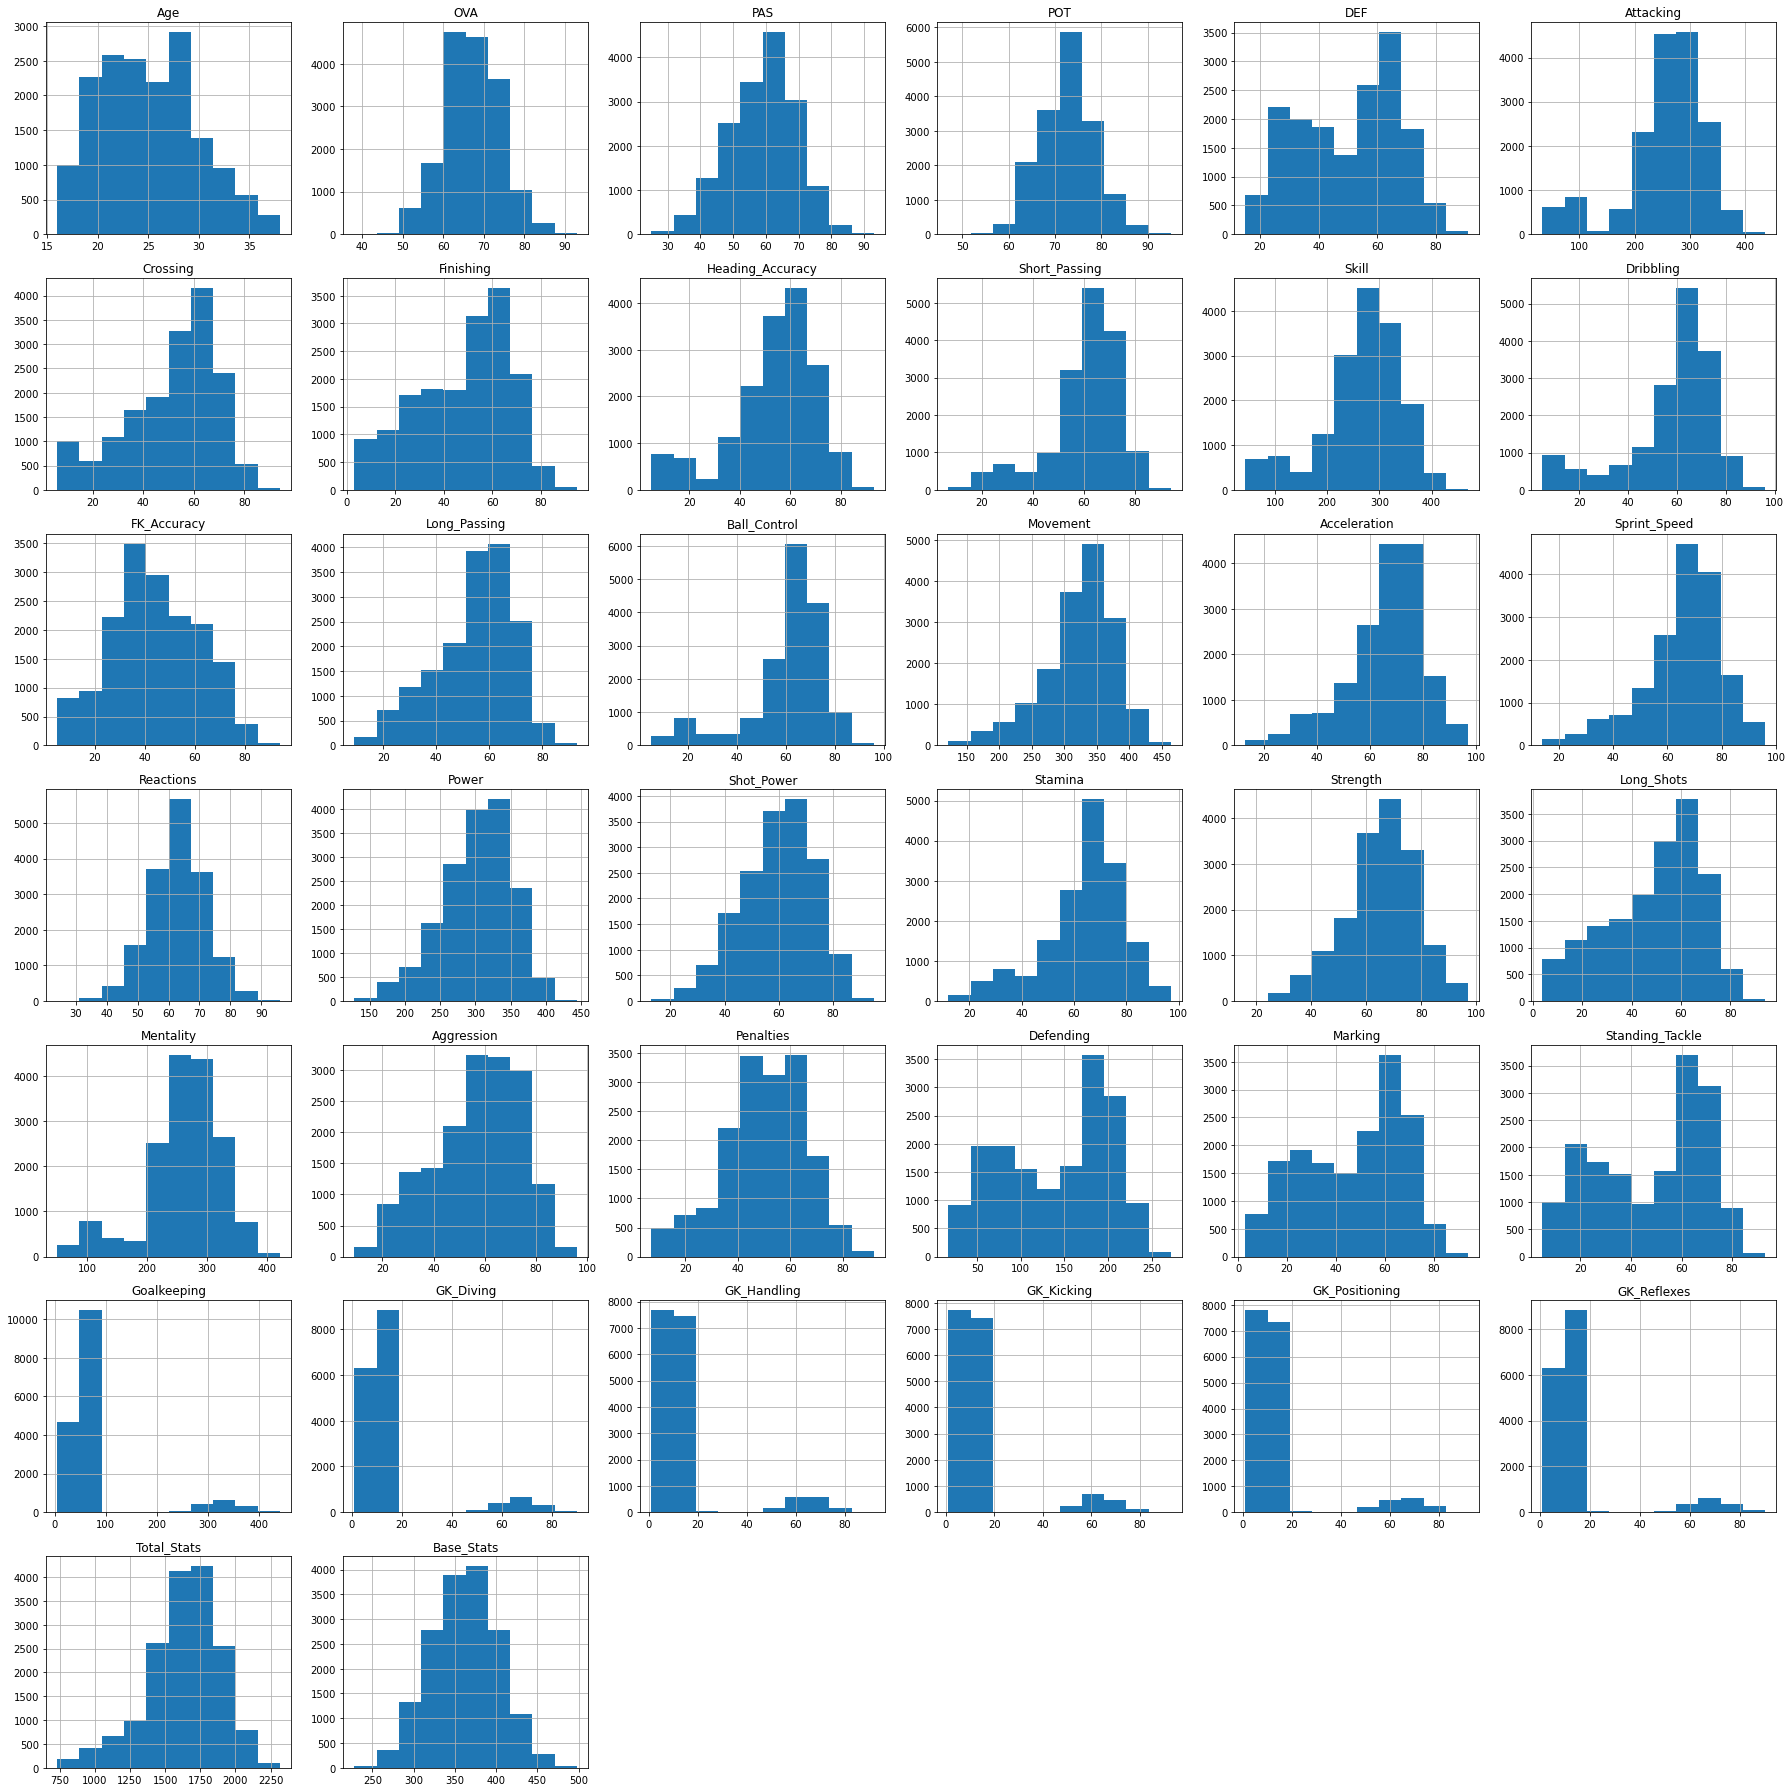

In [37]:
hist_graph = data.select_dtypes(include=['int64'])
hist_graph.hist(figsize=(25,25))
plt.show()

#Inferences from above histogram

1. Most of the players having age between 20 - 26
2. Most of players having the OVA between 60 - 75
3. Most of players having the Potential between 70 - 75
4. Heighest number of players with an Attacking in between 250 - 320
5. The contract period of most players where ended in 2021 and major part of balance players will ending this year 2022

### Top 15 Countries having most players in FIFA 2021

In [38]:
#Total number of countries whose players are included in Fifa 21. 

data.Nationality.nunique()

166

In [39]:
#Top 15 Countries having most players in Fifa 2021

top_countries = data.Nationality.value_counts().head(15)
top_countries


England          1659
Germany          1132
Spain            1095
France            969
Brazil            825
Argentina         748
Italy             537
Netherlands       465
Portugal          356
United States     351
Mexico            329
Uruguay           326
Colombia          297
Japan             289
Poland            280
Name: Nationality, dtype: int64

Text(0, 0.5, 'Nationality')

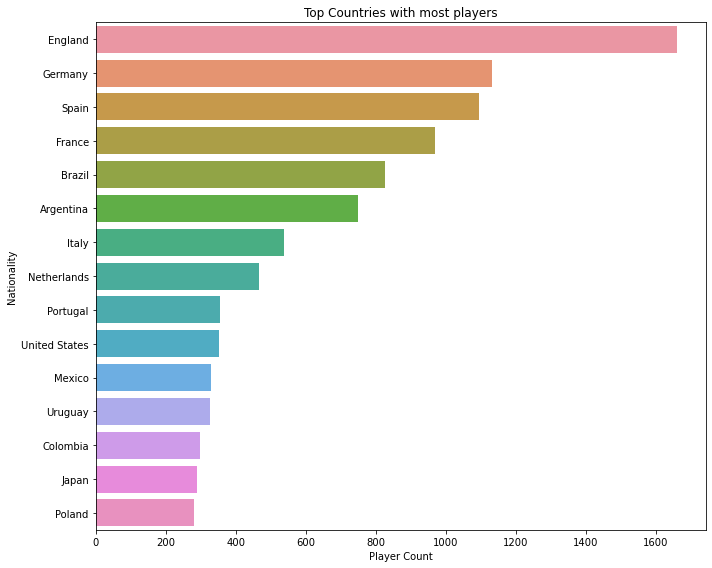

In [40]:
plt.figure(figsize=(10,8))
plt.title("Top Countries with most players")
sns.barplot(top_countries,top_countries.index)
plt.xlabel(xlabel='Player Count')
plt.ylabel(ylabel='Nationality')

### Top 15 Clubs having most players in FIFA 2021

In [41]:
#Total number of clubs whose players are included in Fifa 21.

data.Club.nunique()

909

In [42]:
#Top 15 Countries having most players in Fifa 2021

most_plyr_club = data.Club.value_counts().head(15)
most_plyr_club

Chelsea                    44
AS Monaco                  43
Arsenal                    43
Wolverhampton Wanderers    43
Manchester United          43
Bolton Wanderers           42
Everton                    42
Crystal Palace             41
Aston Villa                41
Tottenham Hotspur          41
Sparta Praha               41
Genoa                      40
Milan                      40
Lazio                      40
FC Barcelona               40
Name: Club, dtype: int64

Text(0.5, 0, 'Clubs')

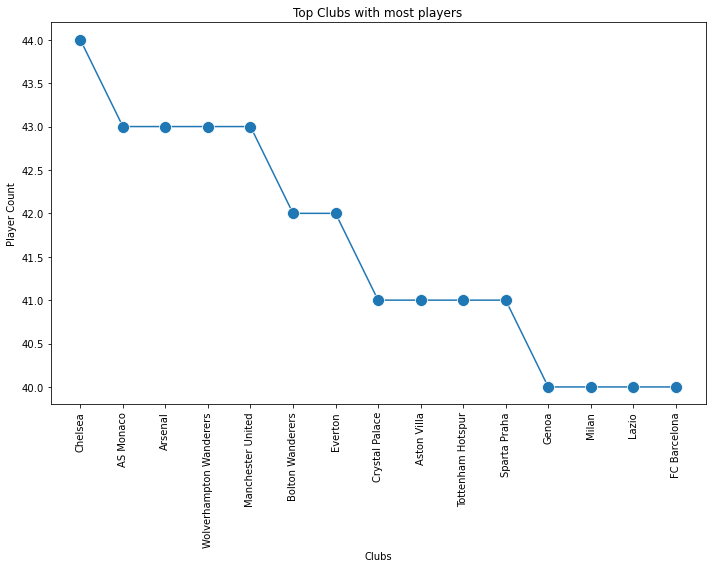

In [43]:
plt.figure(figsize=(10,8))
plt.title("Top Clubs with most players")
sns.lineplot(most_plyr_club.index,most_plyr_club,marker="o",ms=12)
plt.xticks(rotation=90)
plt.ylabel(ylabel='Player Count')
plt.xlabel(xlabel='Clubs')

### Bivariate Analysis

### Top valuable Clubs based on players value

In [44]:
club_avg = pd.DataFrame(data.groupby('Club')['Value'].mean())
club_avg = club_avg.sort_values(by='Value',ascending=False)
club_avg.reset_index(inplace=True)

top_clubs = club_avg.head(10)
top_clubs

,Club,Value
0,FC Bayern München,1.667942e+08
1,FC Barcelona,1.217575e+08
2,Real Madrid,1.085572e+08
3,Liverpool,1.012797e+08
4,Manchester City,1.004488e+08
5,Brazil,8.883333e+07
6,Paris Saint-Germain,8.849097e+07
7,Greece,8.750000e+07
8,Borussia Dortmund,7.928333e+07
9,Tianjin Quanjian FC,7.762000e+07


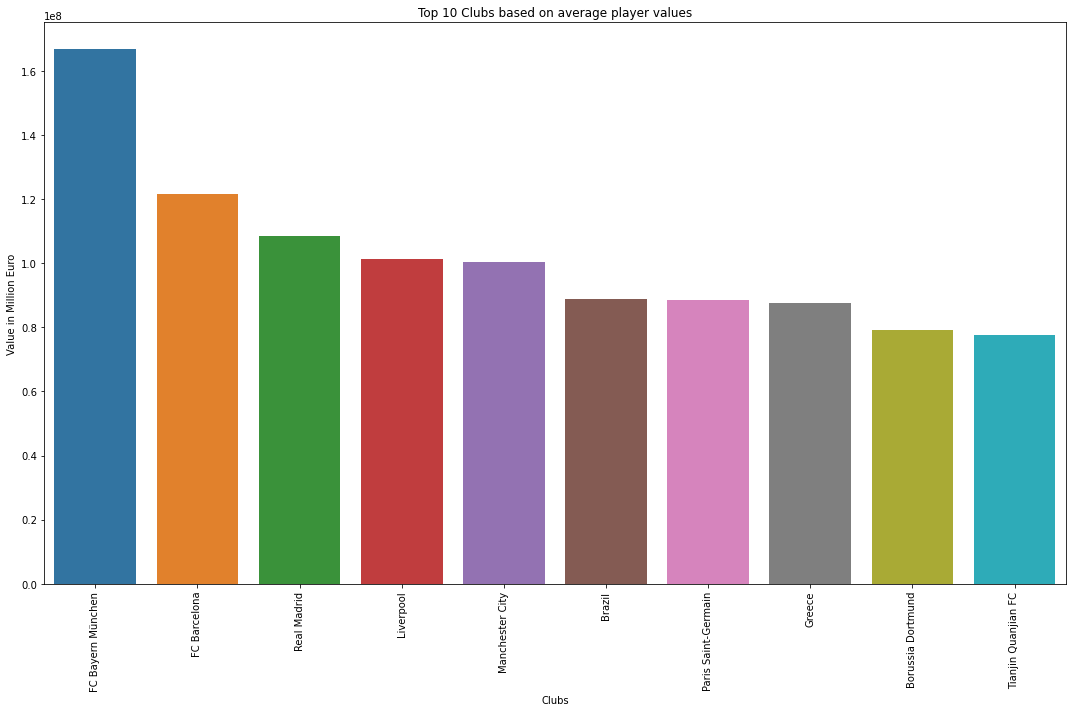

In [45]:
plt.figure(figsize=(15,10))
sns.barplot(top_clubs['Club'],top_clubs['Value'])
plt.xticks(rotation=90)
plt.ylabel('Value in Million Euro')
plt.xlabel('Clubs')
plt.title('Top 10 Clubs based on average player values')
plt.show()

### Finding most players in which age group

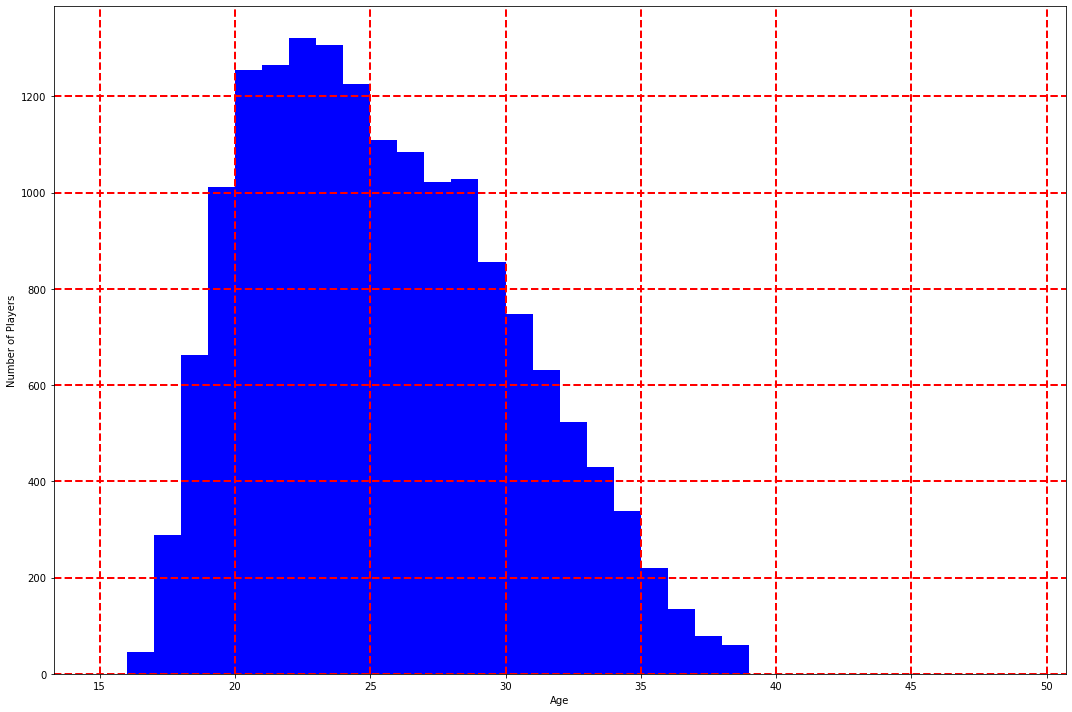

In [46]:
plt.figure(figsize=(15, 10))

plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.grid(color = 'red', linestyle = '--', linewidth = 2)

plt.hist(data.Age, bins=np.arange(15,50,1), color='blue');

From the above graph we can see that most players in between 20-25 age slot, we have to analyse more for a result.

### Age VS OVA

In [47]:
age_group = pd.DataFrame(data.groupby('Age').mean())
age_group=age_group.assign(No_of_Players=data.Age.value_counts())
age_group = age_group[['No_of_Players','OVA','POT','Attacking','Skill','Finishing','Value','Wage']]

age_group.reset_index(inplace=True)
age_group

,Age,No_of_Players,OVA,POT,Attacking,Skill,Finishing,Value,Wage
0,16,45,55.288889,75.822222,198.222222,208.977778,37.844444,8.924444e+05,754.444444
1,17,288,57.010417,75.666667,217.156250,225.861111,41.326389,1.325052e+06,842.187500
2,18,662,58.206949,74.802115,218.832326,227.253776,40.972810,1.917779e+06,1448.413897
3,19,1011,59.658754,74.187933,226.628091,235.117705,42.334322,3.951296e+06,2671.315529
4,20,1254,62.378788,74.129984,239.653907,246.655502,45.209729,8.513054e+06,4705.741627
5,21,1266,63.678515,74.086888,244.383886,252.375197,45.425750,8.702445e+06,5237.361769
6,22,1321,65.520061,74.006813,252.757002,262.533687,46.658592,1.303131e+07,7611.165783
7,23,1307,66.739097,73.626626,255.151492,262.694721,47.140780,1.628046e+07,9054.322877
8,24,1225,67.991837,73.083265,262.901224,271.548571,48.805714,1.842838e+07,10171.265306
9,25,1109,68.495942,72.028855,270.871957,280.362489,50.923354,2.067226e+07,11883.633904


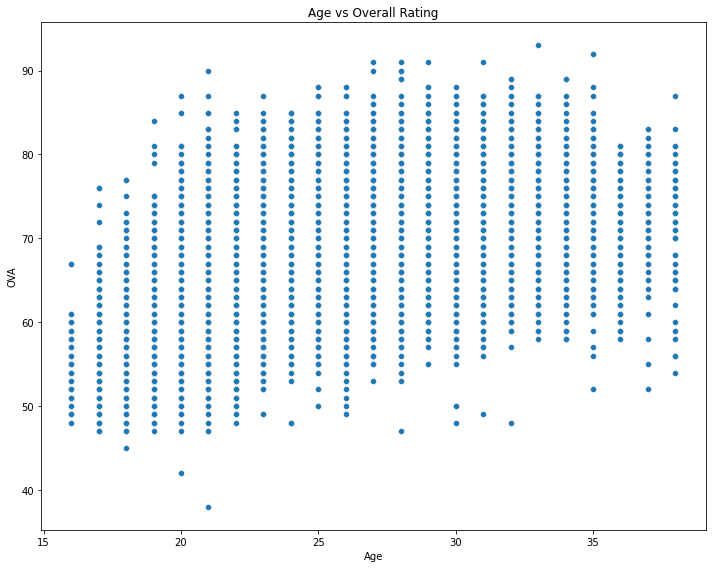

In [48]:
plt.figure(figsize=(10,8))
plt.title('Age vs Overall Rating')
sns.scatterplot(data.Age, data.OVA);

Text(0.5, 0, 'Age Group')

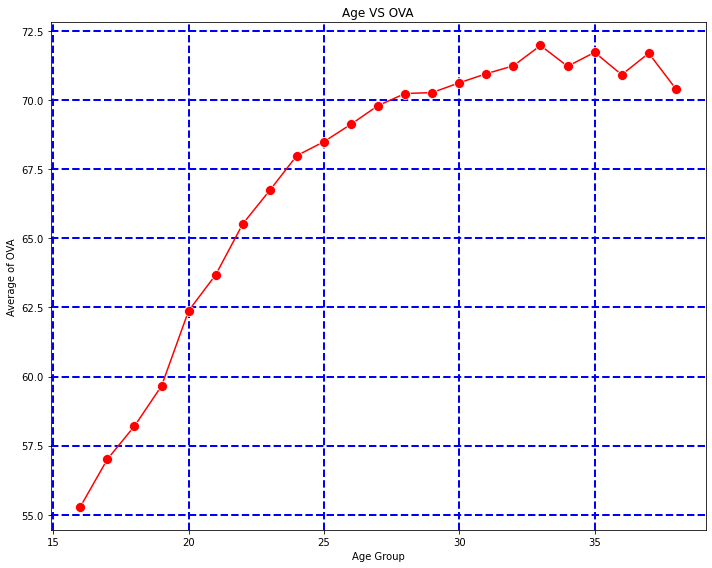

In [49]:
plt.figure(figsize=(10,8))
plt.title("Age VS OVA")
sns.lineplot(age_group['Age'],age_group['OVA'],marker="o",ms=10,color='r')
plt.grid(color = 'blue', linestyle = '--', linewidth = 2)
plt.xticks
plt.ylabel(ylabel='Average of OVA')
plt.xlabel(xlabel='Age Group')

From the above graph we can see that the Overall Rating(OVA) is increasing according to age from 16-30 then it is gone almost like stable, there is not much increasing or decreasing up to the age 30 to 35. Then the OVA is decreasing very fastly. 

### Age VS POT

Text(0.5, 0, 'Age Group')

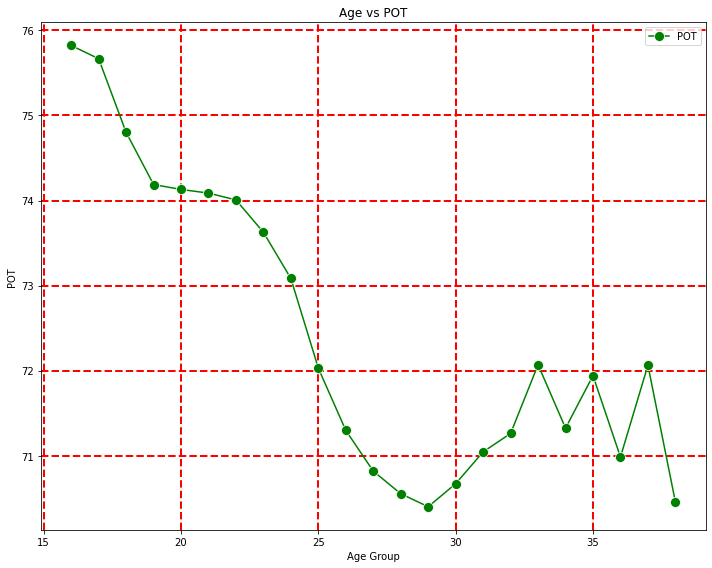

In [50]:
plt.figure(figsize=(10,8))
plt.title("Age vs POT")
sns.lineplot(x=age_group['Age'],y=age_group['POT'],marker="o",ms=10,color='g',label='POT')
plt.grid(color = 'red', linestyle = '--', linewidth = 2)
plt.legend()
plt.ylabel(ylabel='POT')
plt.xlabel(xlabel='Age Group')

From the above graph we can see that the relation between age and potential of the player, When age increases potential decreases. But there is some differnce in between 30-35, There Potential is better than 28-30 age group. Then after 35 potential decreasing fastly.

### Age VS Attacking & Skill

Text(0.5, 0, 'Age Group')

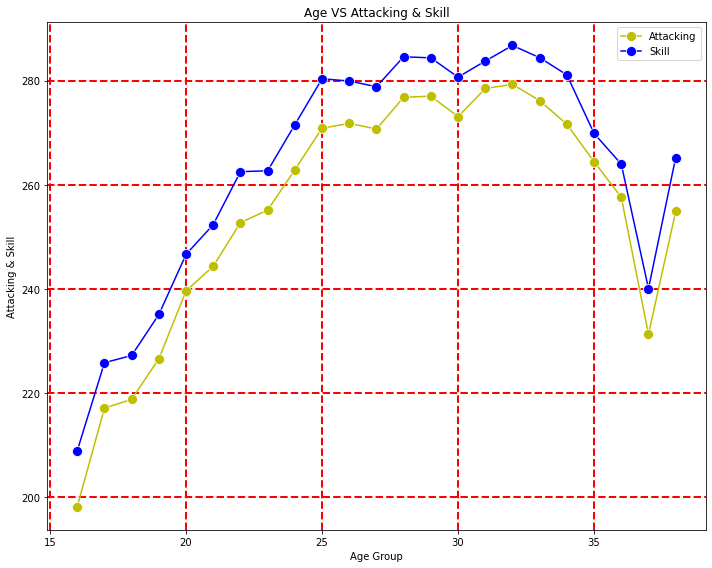

In [51]:
plt.figure(figsize=(10,8))
plt.title("Age VS Attacking & Skill")
sns.lineplot(x=age_group['Age'],y=age_group['Attacking'],marker="o",ms=10,color='y',label='Attacking')
sns.lineplot(x=age_group['Age'],y=age_group['Skill'],marker="o",ms=10,color='b',label='Skill')
plt.grid(color = 'red', linestyle = '--', linewidth = 2)
plt.legend()
plt.ylabel(ylabel='Attacking & Skill')
plt.xlabel(xlabel='Age Group')

From above visualisation we can see that the attacking & skill parameters have almost same pattern on age.Attacking & skill is based on experiance so it can accure only after certain age, so here we can see that best skilled players in between 25-33

From all above visualisation we can see that age has a major part in Potential, Attacking, Skill etc.. 
From the analysis of above graphs we need skilled players for our team but they have heigh wage, Fund limit is a major problem when we creatimg a club. So there is a solution for that is we should create a balanced Team based on include 50% of heighly skilled players and include other half with heighly potential players. So for this purpose we have to select players from 18-34 age group and split this age group as 18-24 for heighly potential players and 25-34 heighly skilled and valuable players

### Splitting the age groups based on above findings

In [52]:
#players of age 18 to 24

Age18_24 = data[(data.Age == 18) |(data.Age == 19) | (data.Age == 20) | (data.Age == 21) | (data.Age == 22) | (data.Age == 23) | (data.Age == 24)] 
                         

#players of age 25 to 34
                  
Age25_34 = data[(data.Age == 25) | (data.Age == 26) | (data.Age == 27) | (data.Age == 28) | (data.Age == 29) | (data.Age == 30)
                  | (data.Age == 31) | (data.Age == 32) | (data.Age == 33) | (data.Age == 34)]
                                            

In [53]:
Age18_24.head()

,Name,Age,OVA,Nationality,Club,Contract,Composure,BP,PAS,Position,POT,Height,Weight_in_lbs,DEF,foot,Value,Wage,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Gender
7,K. Mbappé,21,90,France,Paris Saint-Germain,2018 ~ 2022,84.000000,ST,78,ST LW RW,95,177.80,161,39,Right,1.055000e+09,160000.0,408,78,91,73,83,83.000000,394,92,79.000000,63,70,90,458,96,96,92.000000,92,82.000000,404,86,77.000000,86,76,79,341,62,38.0,91.0,80.000000,70,100,34,34,32.000000,42,13,5,7,11,6,2147,466,Male
30,B. Ronhaar,23,87,Netherlands,Netherlands,111648,59.850995,CF,83,LW,90,180.34,163,37,Left,0.000000e+00,0.0,295,87,74,48,86,44.914718,330,89,49.495682,80,75,86,283,96,91,64.725561,96,64.783255,268,59,65.145076,85,57,67,316,54,85.0,88.0,55.374115,89,44,20,24,46.075207,67,7,20,75,20,20,1603,438,Male
34,J. Sancho,20,87,England,Borussia Dortmund,2017 ~ 2023,84.000000,CAM,81,RM LM CAM,93,180.34,168,37,Right,6.950000e+08,82000.0,373,83,81,38,88,83.000000,380,92,81.000000,48,68,91,435,86,81,91.000000,87,90.000000,328,70,51.000000,77,67,63,313,44,39.0,83.0,87.000000,60,105,32,41,32.000000,52,7,11,10,11,13,1986,430,Male
36,T. Alexander-Arnold,21,87,England,Liverpool,2015 ~ 2024,81.000000,RB,87,RB,92,180.34,152,80,Right,6.000000e+07,110000.0,365,93,56,69,85,62.000000,426,77,88.000000,85,89,87,391,77,83,74.000000,83,74.000000,370,80,66.000000,88,62,74,371,74,82.0,76.0,84.000000,55,241,79,83,79.000000,56,14,15,14,6,7,2220,464,Male
71,Rodri,24,85,Spain,Manchester City,2019 ~ 2024,85.000000,CDM,77,CDM CM,88,190.50,181,82,Right,4.400000e+07,145000.0,346,63,64,75,85,59.000000,359,76,65.000000,54,82,82,350,66,65,68.000000,82,69.000000,382,74,69.000000,84,79,76,362,76,83.0,75.0,82.000000,46,245,83,84,78.000000,49,10,10,7,14,8,2093,448,Male


In [54]:
Age25_34.head()

,Name,Age,OVA,Nationality,Club,Contract,Composure,BP,PAS,Position,POT,Height,Weight_in_lbs,DEF,foot,Value,Wage,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Gender
0,L. Messi,33,93,Argentina,FC Barcelona,2004 ~ 2021,96.0,RW,91,RW ST CF,93,170.18,159,38,Left,675000000.0,560000.0,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,91,32,35,24.0,54,6,11,15,14,8,2231,466,Male
2,K. De Bruyne,29,91,Belgium,Manchester City,2015 ~ 2023,91.0,CAM,93,CAM CM,91,180.34,154,64,Right,87000000.0,370000.0,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,186,68,65,53.0,56,15,13,5,10,13,2304,485,Male
3,R. Lewandowski,31,91,Poland,FC Bayern München,2014 ~ 2023,88.0,ST,78,ST,91,182.88,176,43,Right,80000000.0,240000.0,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,96,35,42,19.0,51,15,6,12,8,10,2195,457,Male
4,Neymar Jr,28,91,Brazil,Paris Saint-Germain,2017 ~ 2022,93.0,LW,86,LW CAM,91,175.26,150,36,Right,90000000.0,270000.0,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,94,35,30,29.0,59,9,9,15,15,11,2175,451,Male
5,J. Oblak,27,91,Slovenia,Atlético Madrid,2014 ~ 2023,68.0,GK,78,GK,93,187.96,192,52,Right,75000000.0,125000.0,95,13,11,15,43,13.0,109,12,13.0,14,40,30,307,43,60,67.0,88,49.0,268,59,78.0,41,78,12,140,34,19.0,11.0,65.0,11,57,27,12,18.0,437,87,92,78,90,90,1413,489,Male


### Multivariate Analysis

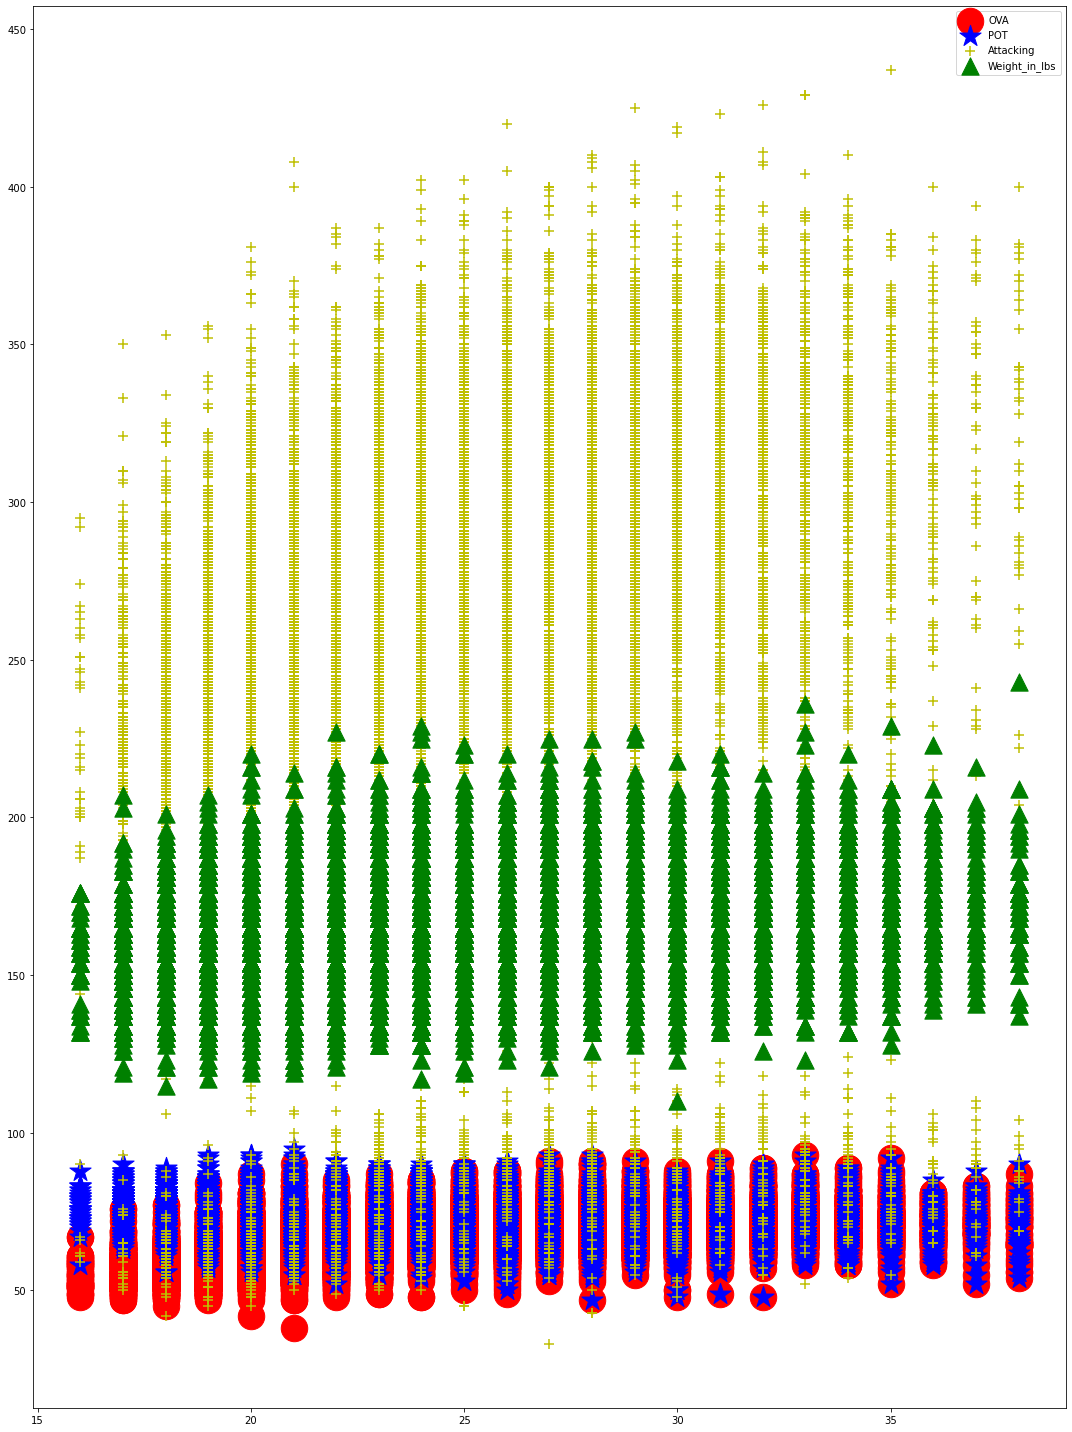

In [55]:
plt.subplots(figsize=(15,20))
plt.scatter(data['Age'],data['OVA'],color='r',label = 'OVA',s= 700, marker = 'o')
plt.scatter(data['Age'],data['POT'],color='b',label = 'POT',s= 500, marker = '*')
plt.scatter(data['Age'],data['Attacking'],color='y',label = 'Attacking',s= 100, marker = '+')
plt.scatter(data['Age'],data['Weight_in_lbs'],color='g',label = 'Weight_in_lbs',s= 300, marker = '^')
plt.legend()

#Inferences from above Pairplot

1. Potential and OVA are directly proportional
2. Mainly focus age range between 22 - 33, because of there Potential, Attacking and OVA are more stable

In [56]:
data.columns

Index(['Name', 'Age', 'OVA', 'Nationality', 'Club', 'Contract', 'Composure',
       'BP', 'PAS', 'Position', 'POT', 'Height', 'Weight_in_lbs', 'DEF',
       'foot', 'Value', 'Wage', 'Attacking', 'Crossing', 'Finishing',
       'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK_Accuracy', 'Long_Passing', 'Ball_Control', 'Movement',
       'Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot_Power', 'Jumping', 'Stamina', 'Strength', 'Long_Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Defending', 'Marking', 'Standing_Tackle',
       'Sliding_Tackle', 'Goalkeeping', 'GK_Diving', 'GK_Handling',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_Stats',
       'Base_Stats', 'Gender'],
      dtype='object')

In [57]:
data.dtypes

Name                 object
Age                   int64
OVA                   int64
Nationality          object
Club                 object
Contract             object
Composure           float64
BP                   object
PAS                   int64
Position             object
POT                   int64
Height              float64
Weight_in_lbs         int32
DEF                   int64
foot                 object
Value               float64
Wage                float64
Attacking             int64
Crossing              int64
Finishing             int64
Heading_Accuracy      int64
Short_Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK_Accuracy           int64
Long_Passing          int64
Ball_Control          int64
Movement              int64
Acceleration          int64
Sprint_Speed          int64
Agility             float64
Reactions             int64
Balance             float64
Power               

# Standard Scaler

In [58]:
from sklearn.preprocessing import StandardScaler
# make a copy of dataframe
scaled_features = data.copy()

col_names = ['Attacking', 'Crossing',
       'Finishing', 'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK_Accuracy', 'Long_Passing', 'Ball_Control',
       'Movement', 'Acceleration', 'Sprint_Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot_Power', 'Jumping', 'Stamina', 'Strength',
       'Long_Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Defending', 'Marking', 'Standing_Tackle',
       'Sliding_Tackle', 'Goalkeeping', 'GK_Diving', 'GK_Handling',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes']

features = scaled_features[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features


The player features required to predict the potential of each player according to his playing position has been scaled using standard scaling as the values were varying

In [59]:
df_postion  = pd.DataFrame()
for position_name, features in scaled_features.groupby(scaled_features['BP'])[col_names].mean().iterrows():
    top_features = dict(features.nlargest(5))
    df_postion[position_name] = tuple(top_features)
df_postion.head()

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,Vision,Defending,Interceptions,Penalties,Long_Passing,Goalkeeping,Sliding_Tackle,Acceleration,Agility,Sliding_Tackle,Sliding_Tackle,Acceleration,Agility,Sliding_Tackle,Finishing
1,FK_Accuracy,Sliding_Tackle,Defending,Positioning,Vision,GK_Reflexes,Defending,Movement,Movement,Crossing,Defending,Sprint_Speed,Acceleration,Defending,Penalties
2,Skill,Standing_Tackle,Standing_Tackle,Volleys,Mentality,GK_Diving,Standing_Tackle,Sprint_Speed,Acceleration,Defending,Standing_Tackle,Movement,Movement,Stamina,Volleys
3,Curve,Marking,Marking,Finishing,Short_Passing,GK_Handling,Interceptions,Agility,Sprint_Speed,Standing_Tackle,Interceptions,Agility,Sprint_Speed,Standing_Tackle,Positioning
4,Long_Shots,Interceptions,Sliding_Tackle,Reactions,FK_Accuracy,GK_Positioning,Marking,Crossing,Finishing,Interceptions,Marking,Balance,Finishing,Crossing,Heading_Accuracy


Players features has been take into consideration for different best positions

# Dream Team

In [60]:
position = []
player = []
club_l = []
wage = []
for col in df_postion.columns:
    tmp_df = pd.DataFrame()
    l = [df_postion[col].values]
    l = l[0]
    l = list(l)
    l.append('Name')
    tmp_df = pd.DataFrame.copy(data[data['BP'] == col][l])
    tmp_df['mean'] = np.mean(tmp_df.iloc[: , :-1] , axis = 1)
    name = tmp_df['Name'][tmp_df['mean'] == tmp_df['mean'].max()].values[0]
    club = data['Club'][data['Name'] == str(name)].values[0]
    position.append(col)
    player.append(name)
    club_l.append(club)
    
gk = ['GK']
forward = ['RW','ST','LW','CF']
midfeilder = ['CAM','CDM','CM','LM','RM' ]
defenders = ['CB','RWB','RB','LB','LWB']

print('GoalKeeper : ')
for p , n , c in zip(position , player , club_l):
    if p in gk:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nFORWARD : ')
for p , n , c in zip(position , player , club_l):
    if p in forward:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nMIDFEILDER : ')
for p , n , c in zip(position , player , club_l):
    if p in midfeilder:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nDEFENDER : ')
for p , n , c in zip(position , player , club_l):
    if p in defenders:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))

GoalKeeper : 
J. Oblak [Club : Atlético Madrid , Position : GK]

FORWARD : 
K. Benzema [Club : Real Madrid , Position : CF]
S. Mané [Club : Liverpool , Position : LW]
M. Salah [Club : Liverpool , Position : RW]
Cristiano Ronaldo [Club : Juventus , Position : ST]

MIDFEILDER : 
K. De Bruyne [Club : Manchester City , Position : CAM]
N. Kanté [Club : Chelsea , Position : CDM]
Parejo [Club : Villarreal CF , Position : CM]
Douglas Costa [Club : Juventus , Position : LM]
Gelson Martins [Club : AS Monaco , Position : RM]

DEFENDER : 
V. van Dijk [Club : Liverpool , Position : CB]
A. Robertson [Club : Liverpool , Position : LB]
Filipe Luís [Club : Atlético Madrid , Position : LWB]
A. Wan-Bissaka [Club : Manchester United , Position : RB]
P. Lahm [Club : FC Bayern München , Position : RWB]


A dream team is displayed above based on player features. `

<AxesSubplot:>

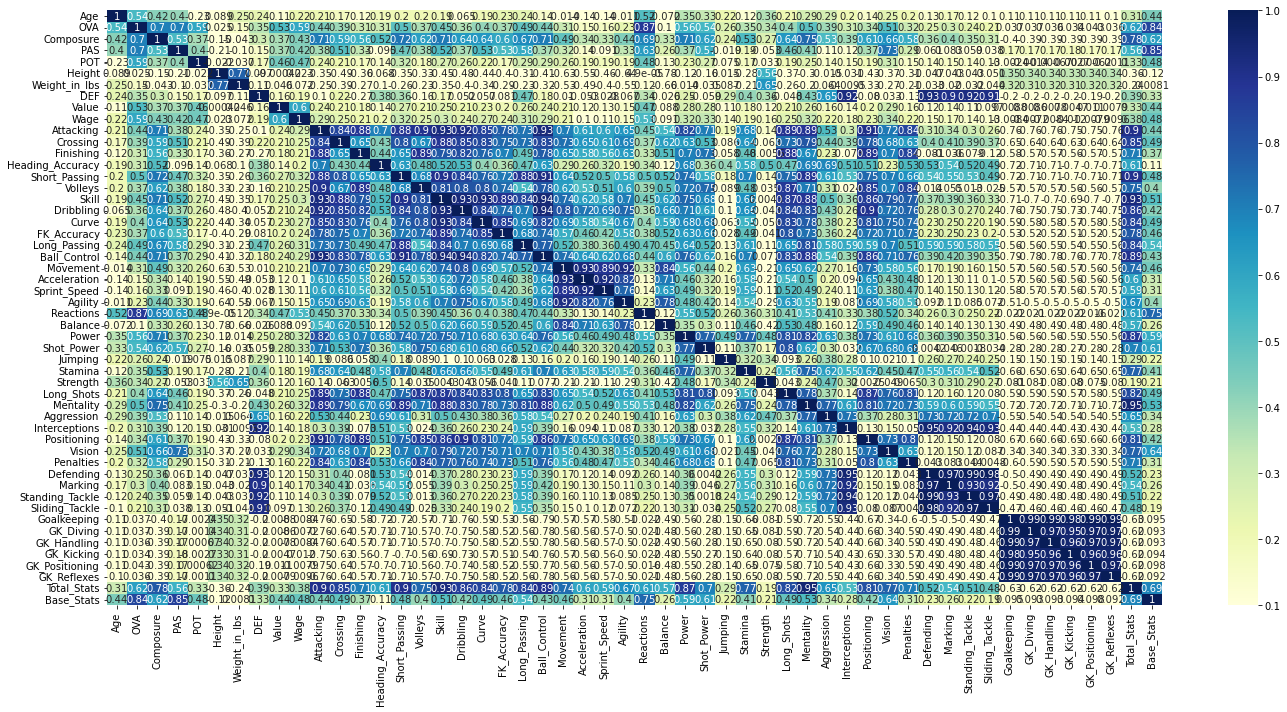

In [61]:
cormet =data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(cormet,vmin=.1,vmax=1,annot=True,cmap='YlGnBu')

### Correlation

<AxesSubplot:>

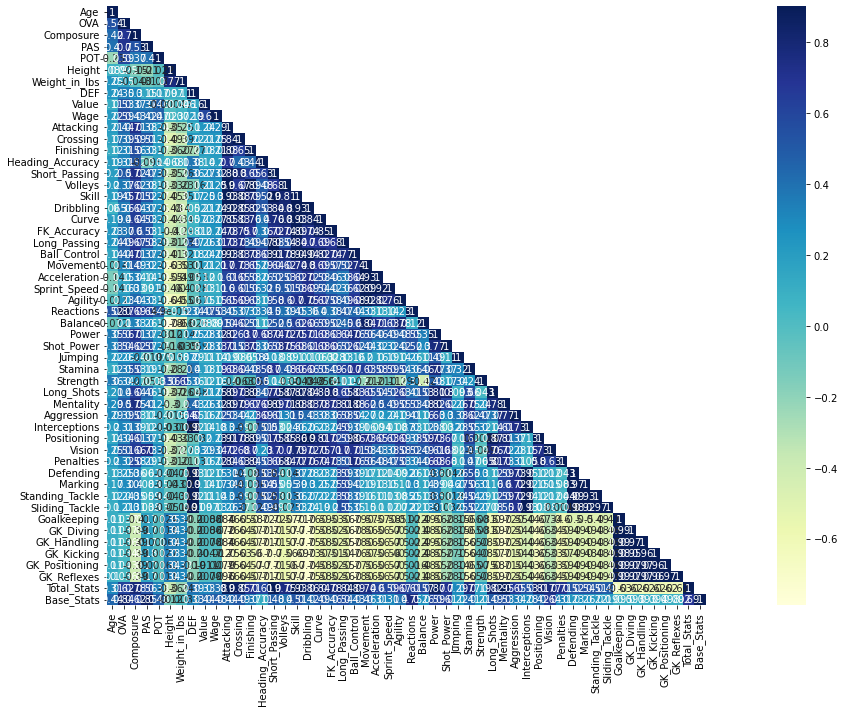

In [62]:
corr=data.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)] = False 
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask, vmax=.9, square=True, annot=True,cmap="YlGnBu")

### Modeling

In [63]:
from sklearn.model_selection import train_test_split

X=scaled_features[col_names]

y=data['OVA']

#splitting the data into training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)



The scaled features has been split into testing and training set

### 1. Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
lin_regressor.fit(X_train,y_train)


LinearRegression()

In [65]:
prediction_linear=lin_regressor.predict(X_test)


In [66]:
#accuracy of testing prediction

acc_LR=lin_regressor.score(X_test,y_test)
print(acc_LR)

0.8679997059542208


In [67]:
#accuracy of training dataset
lin_regressor.score(X_train,y_train)

0.8730854696307929

In [68]:
#To retrieve the intercept

print(lin_regressor.intercept_)

66.87240925352474


In [69]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,prediction_linear))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,prediction_linear)))

Mean Absolute Error: 1.9464803750660882
Root Mean Squared Error: 2.4949247093446587


# 2.Decision Tree Regression

In [70]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [71]:
from sklearn.metrics import mean_squared_error
y_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_predictions)
tree_rmse = np.sqrt(tree_mse)

print('Root Mean Squared Error:', tree_rmse)


Root Mean Squared Error: 2.0870618084740253


# 3. Random Forest Regression 

In [72]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
y_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_predictions)
forest_rmse = np.sqrt(forest_mse)
print('Root Mean Squared Error:', forest_rmse)

Root Mean Squared Error: 1.3082933760703075


We have considered three models of regression here , and Random forest model has performed the best we shall cross validate the models now.

# Cross Validation

# 1.Linear Regression Cross validation

In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_regressor, X_train, y_train,scoring='neg_mean_squared_error', cv=10)
lin_reg_scores = np.sqrt(-scores)
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())
display_scores(lin_reg_scores)

Scores: [2.37766635 2.52662947 2.4792342  2.50980593 2.44472634 2.53180606
 2.45612942 2.5549916  2.54296349 2.33528381]
Mean: 2.475923666330128
Standard Deviation: 0.06956875718633307


# 2. Decision Tree Cross Validation

In [79]:
scores = cross_val_score(tree_reg, X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
tree_scores = np.sqrt(-scores)
display_scores(tree_scores)

Scores: [2.21002705 2.14264068 2.25384745 2.08077239 2.13493323 2.08468769
 2.11006173 2.04645616 2.16090904 2.01368707]
Mean: 2.123802250075455
Standard Deviation: 0.06919556247848792


# 3. Random Forest Cross validation

In [81]:
scores = cross_val_score(forest_reg, X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
forest_scores = np.sqrt(-scores)
display_scores(forest_scores)

Scores: [1.31575989 1.42013661 1.36730015 1.2486429  1.35168863 1.26262649
 1.24047651 1.2981973  1.38932589 1.30178217]
Mean: 1.3195936553940446
Standard Deviation: 0.05797068891407071


Random Forest has performed the best among the models ,so we shall select Random Forest as our model and Fine tune it.

# Fine Tuning

In [82]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [83]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

# Evaluating Model on Test set

In [88]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.5474072494470711

we have got an rmse of .54 which is a very good score.

In [86]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([0.52938728, 0.56485264])

RMSE will be between 0.529 and 0.564 95% of the time

We shall use 5 instances of the test set and shall predict on the final model

In [87]:
some_data = X_test.iloc[:5]
some_label = y_test.iloc[:5]
print("Predictions:", final_model.predict(some_data))
print("Labels:", list(some_label))

Predictions: [62.1        64.83333333 81.         58.86666667 69.53333333]
Labels: [62, 65, 81, 58, 70]


The predictions are very much accurate and the model performed well